In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
errors = xr.open_dataset("../data/output/test_error.nc")

In [3]:
def mass_weight(w, err):
    mass = w.sum('z')
    mw =  (w * err).sum('z')/mass
    return mw.median('seed').mean('y')

ds = xr.Dataset(dict(
    mqt = mass_weight(errors.w, errors.qt),
    msl = mass_weight(errors.w, errors.sl),
    nhidden=errors.nhidden.isel(seed=0),
    window_size=errors.window_size.isel(seed=0),

))

df = ds.to_dataframe().reset_index()

In [4]:
varyn = df[(df.window_size == 10) & (df.epoch >= 1)]
varyt = df[df.nhidden == 128]

In [5]:
varyn.head()

,epoch,model,seed,mqt,msl,nhidden,window_size
9,1,VaryNHid-128,0,0.382443,0.654440,128,10
10,1,VaryNHid-256,0,0.399519,0.708726,256,10
11,1,VaryNHid-5,0,0.729930,1.406783,5,10
12,1,VaryNHid-64,0,0.464101,0.857954,64,10
13,1,VaryT-10,0,0.401179,0.682181,128,10


In [6]:
def plot_error_series(x, y, hue, data, ax=None, **kwargs):
    
    if not ax:
        ax = plt.gca()
    
    lines = []
    ns = []
    for n, val in data.groupby(hue):
        val = val.groupby(x).min().reset_index()
        val = val.sort_values(x)
        line, = ax.plot(val[x], val[y], label=n, **kwargs)
        lines.append(line)
        ns.append(n)
    return ns, lines


def plot_parameter_experiments(y, df, ax=None):
    if not ax:
        ax = plt.gca()
        
    ax.set_prop_cycle(plt.cycler('alpha', [.2, .4, .6, .8, 1.0]))

    t, wind = plot_error_series("epoch", y, "nhidden",
                      df[(df.window_size == 10) & (df.epoch >= 1)],
                      marker='s', color='k', ax=ax)

    n, nhid = plot_error_series("epoch", y, "window_size",
                      df[(df.nhidden == 128) & (df.epoch >= 1) & (df.window_size > 2)],
                      marker='s', color='r', ax=ax)
    
    return t, wind, n, nhid


def add_legend(args, ax):
    t, wind, n, nhid = args
    leg1 = plt.legend(wind, t, title='Number Hidden')
    ax.add_artist(leg1)
    leg2 = plt.legend(nhid, n, title='Window Size')


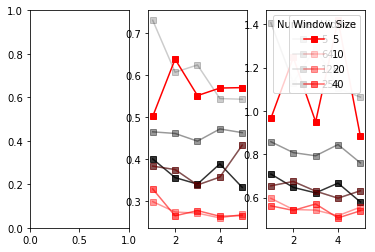

In [8]:
fig, axs = plt.subplots(1, 3)


plot_parameter_experiments("mqt", df, ax=axs[1])
args = plot_parameter_experiments("msl", df, ax=axs[2])
add_legend(args, ax=axs[2])